In [7]:
import gdrive_refs as gdrive
import zipfile
from utils import *
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Fetching

Using DataHub and `utils.py` to collect relevant datasets. We will store the datasets into a dictonary to facilitate data collection. 

We start by fetching specific csv files from a Google Drive

In [8]:
for gdrive_file in gdrive.gdrive_dic:
    print(f'starting download of: {gdrive_file[1]}')
    gdrive_id, file = gdrive_file[0], gdrive_file[1]
    fetch_and_cache_gdrive(gdrive_id, file, data_dir="./../data", force=False)

starting download of: pm25National.csv
Using cached version that was downloaded (UTC): Fri Apr 15 17:07:37 2022
starting download of: ozone_2000.csv
Using cached version that was downloaded (UTC): Wed May 11 16:57:40 2022
starting download of: ozone_2001.csv
Using cached version that was downloaded (UTC): Wed May 11 16:57:45 2022
starting download of: ozone_2002.csv
Using cached version that was downloaded (UTC): Wed May 11 16:57:49 2022
starting download of: ozone_2003.csv
Using cached version that was downloaded (UTC): Wed May 11 16:57:53 2022
starting download of: ozone_2004.csv
Using cached version that was downloaded (UTC): Wed May 11 16:57:57 2022
starting download of: ozone_2005.csv
Using cached version that was downloaded (UTC): Wed May 11 16:58:01 2022
starting download of: ozone_2006.csv
Using cached version that was downloaded (UTC): Wed May 11 16:58:05 2022
starting download of: ozone_2007.csv
Using cached version that was downloaded (UTC): Wed May 11 16:58:10 2022
starting

We then fetch `.zip` files from the EPA and convert them into csv

In [9]:
#Years we want to collect from online sources
years = [str(i) for i in range(2000,2021)]

#EPA identifies pollutants with a 5-digit unique indentifier
epa_pollutants_codes = ["44201","42401","42101","42602"]

# Creating a list of urls from which to fetch the corresponing zip file
url = ["https://aqs.epa.gov/aqsweb/airdata/daily_"+epa_pollutants_codes[i]+"_"+years[j]+".zip" for i in range(len(epa_pollutants_codes)) for j in range(len(years))]
url = url + ["https://aqs.epa.gov/aqsweb/airdata/annual_aqi_by_county_"+years[j]+".zip" for j in range(len(years))]
url

['https://aqs.epa.gov/aqsweb/airdata/daily_44201_2000.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2001.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2002.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2003.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2004.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2005.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2006.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2007.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2008.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2009.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2010.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2011.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2012.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2013.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2014.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2015.zip',
 'https://aqs.epa.gov/aqsweb/airdata/dai

### Careful this next one takes a long time to run ($\approx 5$ mins)!
Fetching `.zip` files from the EPA website and converting them into a `.csv`.

In [5]:
def processing_url_fetch(url):
    for data_url in url:
        data_dir="./../data"
        if '44201' in data_url:
            zip_file = 'ozone_'+data_url[-8:-3]+'zip'
            csv_file = 'ozone_'+data_url[-8:-3]+'csv'
            fetch_and_cache(data_url, zip_file, data_dir, force=False)
            with zipfile.ZipFile(data_dir+'/'+zip_file, 'r') as zip_ref:
                zip_ref.extractall(path = data_dir)
                try:
                    os.remove(data_dir+'/'+zip_file)
                    os.rename(data_dir+'/'+data_url[-20:-3]+'csv', data_dir+'/'+csv_file)
                except:
                    None
            print("Processed {}".format(csv_file))
        if '42401' in data_url:
            zip_file = 'so2_'+data_url[-8:-3]+'zip'
            csv_file = 'so2_'+data_url[-8:-3]+'csv'
            fetch_and_cache(data_url, zip_file, data_dir, force=False)
            with zipfile.ZipFile(data_dir+'/'+zip_file, 'r') as zip_ref:
                zip_ref.extractall(path = data_dir)
                try:
                    os.remove(data_dir+'/'+zip_file)
                    os.rename(data_dir+'/'+data_url[-20:-3]+'csv', data_dir+'/'+csv_file)
                except:
                    None
            print("Processed {}".format(csv_file))
        if '42101' in data_url:
            zip_file = 'co_'+data_url[-8:-3]+'zip'
            csv_file = 'co_'+data_url[-8:-3]+'csv'
            fetch_and_cache(data_url, zip_file, data_dir, force=False)
            with zipfile.ZipFile(data_dir+'/'+zip_file, 'r') as zip_ref:
                zip_ref.extractall(path = data_dir)
                try:
                    os.remove(data_dir+'/'+zip_file)
                    os.rename(data_dir+'/'+data_url[-20:-3]+'csv', data_dir+'/'+csv_file)
                except:
                    None
            print("Processed {}".format(csv_file))
        if '42602' in data_url:
            zip_file = 'no2_'+data_url[-8:-3]+'zip'
            csv_file = 'no2_'+data_url[-8:-3]+'csv'
            fetch_and_cache(data_url, zip_file, data_dir, force=False)
            with zipfile.ZipFile(data_dir+'/'+zip_file, 'r') as zip_ref:
                zip_ref.extractall(path = data_dir)
                try:
                    os.remove(data_dir+'/'+zip_file)
                    os.rename(data_dir+'/'+data_url[-20:-3]+'csv', data_dir+'/'+csv_file)
                except:
                    None
            print("Processed {}".format(csv_file))

processing_url_fetch(url)

Downloading... Done!
Processed ozone_2000.csv
Downloading... Done!
Processed ozone_2001.csv
Downloading... Done!
Processed ozone_2002.csv
Downloading... Done!
Processed ozone_2003.csv
Downloading... Done!
Processed ozone_2004.csv
Downloading... Done!
Processed ozone_2005.csv
Downloading... Done!
Processed ozone_2006.csv
Downloading... Done!
Processed ozone_2007.csv
Downloading... Done!
Processed ozone_2008.csv
Downloading... Done!
Processed ozone_2009.csv
Downloading... Done!
Processed ozone_2010.csv
Downloading... Done!
Processed ozone_2011.csv
Downloading... Done!
Processed ozone_2012.csv
Downloading... Done!
Processed ozone_2013.csv
Downloading... Done!
Processed ozone_2014.csv
Downloading... Done!
Processed ozone_2015.csv
Downloading... Done!
Processed ozone_2016.csv
Downloading... Done!
Processed ozone_2017.csv
Downloading... Done!
Processed ozone_2018.csv
Downloading... Done!
Processed ozone_2019.csv
Downloading... Done!
Processed ozone_2020.csv
Downloading... Done!
Processed so2

# Predicting deaths

We saw in the `relating_aqi_pm25` notebook that there is not correlation between $AQI$ and $PM2.5$ with the dataset provided by EPA. We concluded that the correlation itself is not linear and also depends on other factors such that $PM10$ and pollutant concentration in the air. This way, we want to create a predictor of deaths attributed to air pollution with the sole values of:
- $AQI$
- $PM2.5$
- Concentrations of $CO$, $SO_2$, $O_3$ (ozone) and $NO_2$

To do this, we will center our analysis on the data provided by the World Health Organization and the EPA to build a predictor that can accurately predict the yearly death tolls on the US alone.

# Building the table

Let us join the tables comprising the Median $AQI$, $PM2.5$, and the $AQI$ of each pollutant.

#### $PM2.5$

In [10]:
pm25 = pd.read_csv('./../data/pm25National.csv')
# We only take the years 2000 to 2016
pm25_filtered = pm25[(pm25['Year']>=2000) & (pm25['Year']<=2016)].loc[:,['Year','Mean']].rename(columns = {'Mean':'PM2.5 Mean'})
pm25_filtered

,Year,PM2.5 Mean
0,2000,13.497383
1,2001,13.225067
2,2002,12.827120
3,2003,12.332006
4,2004,12.023175
5,2005,12.868947
6,2006,11.622669
7,2007,11.920433
8,2008,10.891642
9,2009,9.883770


#### Median AQI

In [12]:
years = [str(i) for i in range(2001,2017)]
annual_aqi_us_county = pd.read_csv("./../data/annual_aqi_by_county_2000.csv").loc[:,['Year', 'State', 'County','Median AQI']]
increment = 1
for year in years:
    df = pd.read_csv("./../data/annual_aqi_by_county_"+year+".csv").loc[:,['Year', 'State', 'County','Median AQI']]
    annual_aqi_us_county = pd.concat([annual_aqi_us_county, df], axis=0)
    increment += 1
annual_aqi_us_county = annual_aqi_us_county.reset_index().drop(columns='index')
annual_aqi_us_filtered = annual_aqi_us_county.groupby('Year').mean().reset_index()
annual_aqi_us_filtered

,Year,Median AQI
0,2000,39.700441
1,2001,39.335074
2,2002,38.721453
3,2003,38.533104
4,2004,37.500871
5,2005,39.577797
6,2006,38.954464
7,2007,40.444946
8,2008,38.860000
9,2009,36.533212


Now we load the datasets for air pollutants AQIs (which we know are related to air concentration).

#### Interlude

Showing the data cleaning we do all pollutant concentrations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351585 entries, 0 to 351584
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           351585 non-null  int64  
 1   County Code          351585 non-null  int64  
 2   Site Num             351585 non-null  int64  
 3   Parameter Code       351585 non-null  int64  
 4   POC                  351585 non-null  int64  
 5   Latitude             351585 non-null  float64
 6   Longitude            351585 non-null  float64
 7   Datum                351585 non-null  object 
 8   Parameter Name       351585 non-null  object 
 9   Sample Duration      351585 non-null  object 
 10  Pollutant Standard   351585 non-null  object 
 11  Date Local           351585 non-null  object 
 12  Units of Measure     351585 non-null  object 
 13  Event Type           351585 non-null  object 
 14  Observation Count    351585 non-null  int64  
 15  Observation Perce

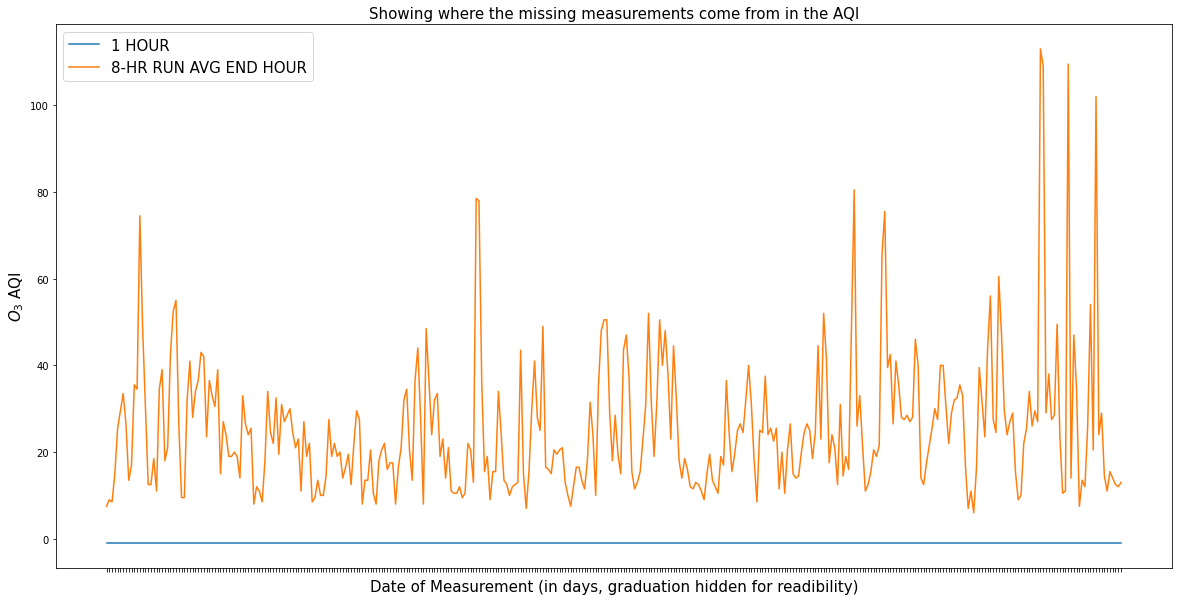

In [25]:
co_concentration = pd.read_csv('./../data/co_2000.csv')

co_concentration.info()
plt.figure(figsize=(20,10))
ax = sns.lineplot(data = co_concentration.loc[co_concentration['City Name']=='Birmingham',:].fillna(-1), x = 'Date Local', y = 'AQI', hue = 'Sample Duration', ci=None)
ax.set(xticklabels=[])
plt.title('Showing where the missing measurements come from in the AQI', fontsize = 15)
plt.xlabel('Date of Measurement (in days, graduation hidden for readibility)', fontsize = 15)
plt.ylabel('$O_3$ AQI', fontsize = 15)
plt.legend(fontsize=15)
plt.show()

... the plot above perfectly shows that the missing data is only contained in the 1-hour window measurements. Fortunately, no further processing is required.

#### $CO$ AQI

In [30]:
co_concentration = co_concentration.loc[pd.notna(co_concentration['AQI']),['AQI']].mean().reset_index().rename(columns={0: "CO AQI"}).drop(columns='index')
co_concentration['Year'] = pd.Series(2000)

years = [str(i) for i in range(2001,2020)]
for year in years:
    df = pd.read_csv('./../data/co_'+year+'.csv')
    df = df.loc[pd.notna(df['AQI']),['AQI']].mean().reset_index().rename(columns={0: "CO AQI"}).drop(columns='index')
    df['Year'] = pd.Series(int(year))
    co_concentration = pd.concat([co_concentration, df], axis=0)
co_concentration

/Users/aymeric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CO AQI,Year
0,12.536678,2000
0,11.818071,2001
0,10.889842,2002
0,10.349962,2003
0,9.350434,2004
0,8.662587,2005
0,8.126856,2006
0,7.137915,2007
0,6.471224,2008
0,6.055578,2009


#### $NO_2$ AQI

In [31]:
no2_concentration = pd.read_csv('./../data/no2_2000.csv') 
no2_concentration = no2_concentration.loc[pd.notna(no2_concentration['AQI']),['AQI']].mean().reset_index().rename(columns={0: "NO2 AQI"}).drop(columns='index')
no2_concentration['Year'] = pd.Series(2000)

years = [str(i) for i in range(2001,2017)]
for year in years:
    df = pd.read_csv('./../data/no2_'+year+'.csv')
    df = df.loc[pd.notna(df['AQI']),['AQI']].mean().reset_index().rename(columns={0: "NO2 AQI"}).drop(columns='index')
    df['Year'] = pd.Series(int(year))
    no2_concentration = pd.concat([no2_concentration, df], axis=0)
no2_concentration

/Users/aymeric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/aymeric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NO2 AQI,Year
0,27.491528,2000
0,26.929423,2001
0,25.932520,2002
0,25.004868,2003
0,23.438959,2004
0,23.754289,2005
0,22.775990,2006
0,21.902248,2007
0,21.095123,2008
0,19.085690,2009


#### $O_3$ (Ozone) AQI

In [32]:
ozone_concentration = pd.read_csv('./../data/ozone_2000.csv') 
ozone_concentration = ozone_concentration.loc[pd.notna(ozone_concentration['AQI']),['AQI']].mean().reset_index().rename(columns={0: "Ozone AQI"}).drop(columns='index')
ozone_concentration['Year'] = pd.Series(2000)

years = [str(i) for i in range(2001,2017)]
for year in years:
    df = pd.read_csv('./../data/ozone_'+year+'.csv')
    df = df.loc[pd.notna(df['AQI']),['AQI']].mean().reset_index().rename(columns={0: "Ozone AQI"}).drop(columns='index')
    df['Year'] = pd.Series(int(year))
    ozone_concentration = pd.concat([ozone_concentration, df], axis=0)
ozone_concentration

/Users/aymeric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/aymeric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/aymeric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Ozone AQI,Year
0,45.949634,2000
0,47.056199,2001
0,48.392076,2002
0,45.508254,2003
0,42.283625,2004
0,46.045732,2005
0,45.465603,2006
0,45.932088,2007
0,43.395879,2008
0,39.535504,2009


#### $SO_2$ AQI

In [33]:
so2_concentration = pd.read_csv('./../data/so2_2000.csv') 
so2_concentration = so2_concentration.loc[pd.notna(so2_concentration['AQI']),['AQI']].mean().reset_index().rename(columns={0: "SO2 AQI"}).drop(columns='index')
so2_concentration['Year'] = pd.Series(2000)

years = [str(i) for i in range(2001,2017)]
for year in years:
    df = pd.read_csv('./../data/so2_'+year+'.csv')
    df = df.loc[pd.notna(df['AQI']),['AQI']].mean().reset_index().rename(columns={0: "SO2 AQI"}).drop(columns='index')
    df['Year'] = pd.Series(int(year))
    so2_concentration = pd.concat([so2_concentration, df], axis=0)
so2_concentration

/Users/aymeric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/aymeric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SO2 AQI,Year
0,20.215974,2000
0,19.220851,2001
0,17.658397,2002
0,17.528784,2003
0,16.750093,2004
0,16.671852,2005
0,14.980272,2006
0,14.083842,2007
0,13.361089,2008
0,10.799102,2009


#### Deaths numbers for the US

In [34]:
deaths = pd.read_csv('./../data/total_death_world.csv').rename(columns={'Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: All Ages (Number)':'Deaths'})
deaths_filtered = deaths.loc[(deaths['Code']=='USA') & (deaths['Year']>=2000) & (deaths['Year']<=2016),['Year','Deaths']].reset_index().drop(columns='index')
deaths_filtered

,Year,Deaths
0,2000,102989
1,2001,101326
2,2002,99744
3,2003,96526
4,2004,92316
5,2005,90806
6,2006,88050
7,2007,83248
8,2008,78860
9,2009,74243


# Joining all tables


In [35]:
joined_all = pm25_filtered
dfs_to_join = [annual_aqi_us_filtered,co_concentration,no2_concentration,ozone_concentration,so2_concentration,deaths_filtered]

for df in dfs_to_join:
    joined_all = joined_all.merge(right=df,left_on='Year',right_on='Year')

## Data cleaning: outlying the ouliers

To make sure our data does not present to many outliers in the dataset we use, we are going to plot a `boxplot` of the table `joined_all`.

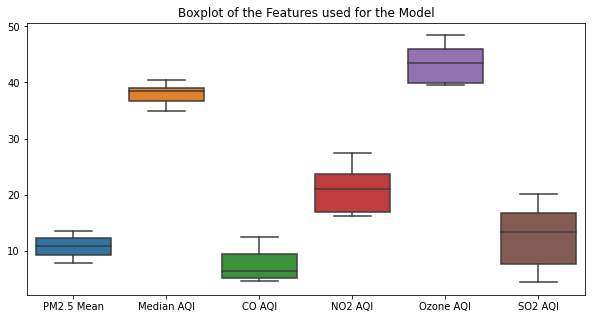

In [68]:
plt.figure(figsize=(10,5))
plt.title("Boxplot of the Features used for the Model")
sns.boxplot(data = joined_all.loc[:,'PM2.5 Mean':'SO2 AQI']);

## EDA

We will proceed to analyze the colinearity of our features. To do so, we figured that plotting a heatmap of a correlation matrix would be the most efficient.

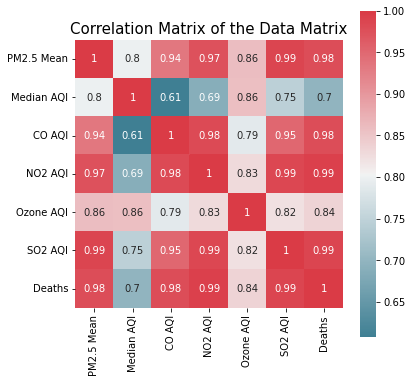

In [69]:
corr = joined_all.loc[:,'PM2.5 Mean':'Deaths'].corr()
#mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(6,6))
plt.title("Correlation Matrix of the Data Matrix", fontsize = 15)
sns.heatmap(joined_all.loc[:,'PM2.5 Mean':'Deaths'].corr(),cmap=cmap, annot=True, square=True);

In [70]:
joined_all

,Year,PM2.5 Mean,Median AQI,CO AQI,NO2 AQI,Ozone AQI,SO2 AQI,Deaths
0,2000,13.497383,39.700441,12.536678,27.491528,45.949634,20.215974,102989
1,2001,13.225067,39.335074,11.818071,26.929423,47.056199,19.220851,101326
2,2002,12.827120,38.721453,10.889842,25.932520,48.392076,17.658397,99744
3,2003,12.332006,38.533104,10.349962,25.004868,45.508254,17.528784,96526
4,2004,12.023175,37.500871,9.350434,23.438959,42.283625,16.750093,92316
5,2005,12.868947,39.577797,8.662587,23.754289,46.045732,16.671852,90806
6,2006,11.622669,38.954464,8.126856,22.775990,45.465603,14.980272,88050
7,2007,11.920433,40.444946,7.137915,21.902248,45.932088,14.083842,83248
8,2008,10.891642,38.860000,6.471224,21.095123,43.395879,13.361089,78860
9,2009,9.883770,36.533212,6.055578,19.085690,39.535504,10.799102,74243


In [73]:
from sklearn import linear_model as lm
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

model = lm.LinearRegression(fit_intercept=True)
X = joined_all.loc[:,['SO2 AQI', 'Median AQI', 'Ozone AQI']]
y = joined_all.loc[:,'Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model.fit(X_train,y_train)
y_pred = model.predict(X_train)
y_valid = model.predict(X_test)

print("Coefficients of our model",model.coef_)
print("\nPerformance of the model")
print("Training set:\t Pearson coeff:",sc.stats.pearsonr(y_pred, y_train)[0],"\t RMSE:",np.sqrt(mse(y_pred, y_train)))
print("Training set:\t Pearson coeff:",sc.stats.pearsonr(y_valid, y_test)[0],"\t RMSE:",np.sqrt(mse(y_valid, y_test)))

Coefficients of our model [ 2815.80886841 -2381.35621827  1440.15960869]

Performance of the model
Training set:	 Pearson coeff: 0.9991554039872284 	 RMSE: 493.3473033345299
Training set:	 Pearson coeff: 0.9957411325196678 	 RMSE: 2241.757264212593


# Inferencing deaths in the US from air pollution

<AxesSubplot:xlabel='Median AQI', ylabel='Deaths'>

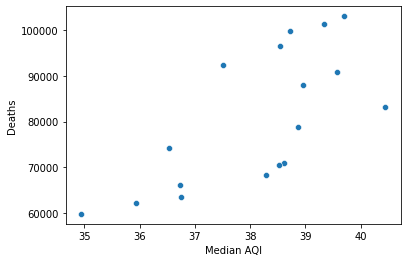

In [53]:
sns.scatterplot(data = joined_all, x = 'Median AQI', y = 'Deaths')